# Importing the required modules

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , f1_score, confusion_matrix

# Loading the data

In [8]:
df = pd.read_csv('Fake News Detection Dataset.csv')
df.head(10)

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
0,1606,10,4,24,6.176750,1
1,3718,10,8,25,5.826770,1
2,2634,10,7,18,4.619040,1
3,5560,10,6,18,4.961424,1
4,7494,10,4,21,4.114324,1
5,3159,39,5,16,4.582874,1
6,7232,11,4,21,5.756046,1
7,7509,11,5,21,4.502690,1
8,1509,11,6,24,3.943672,1
9,1657,11,8,19,5.419068,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4500 non-null   int64  
 1   Word_Count           4500 non-null   int64  
 2   Number_of_Sentence   4500 non-null   int64  
 3   Unique_Words         4500 non-null   int64  
 4   Average_Word_Length  4500 non-null   float64
 5   Label                4500 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 211.1 KB


In [13]:
df.describe()

,ID,Word_Count,Number_of_Sentence,Unique_Words,Average_Word_Length,Label
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,5469.140000,53.934000,8.934667,24.943333,4.968105,0.329556
std,2599.193059,24.872743,3.407847,11.540708,1.152394,0.470104
min,1002.000000,10.000000,4.000000,5.000000,3.000385,0.000000
25%,3228.750000,35.000000,6.000000,17.000000,3.980553,0.000000
50%,5449.500000,52.000000,9.000000,22.000000,4.906200,0.000000
75%,7706.750000,75.000000,12.000000,33.000000,5.996111,1.000000
max,9999.000000,100.000000,15.000000,50.000000,6.999799,1.000000


## Data Visualtization

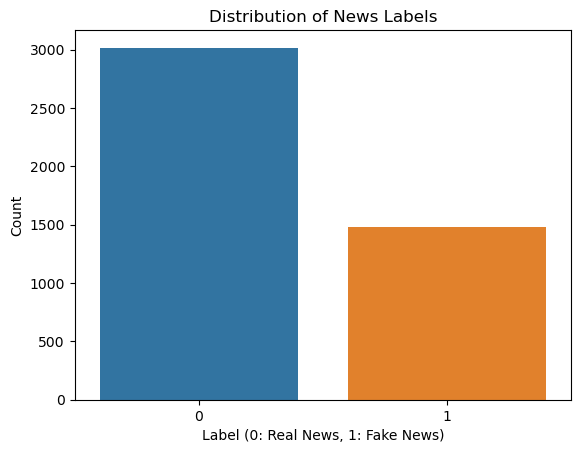

In [16]:
axs = sns.countplot(x = 'Label', data = df)
plt.xlabel('Label (0: Real News, 1: Fake News)')
plt.ylabel('Count')
plt.title('Distribution of News Labels')
plt.show()

The dataset contains 3017 real news and 1483 fake news instances.

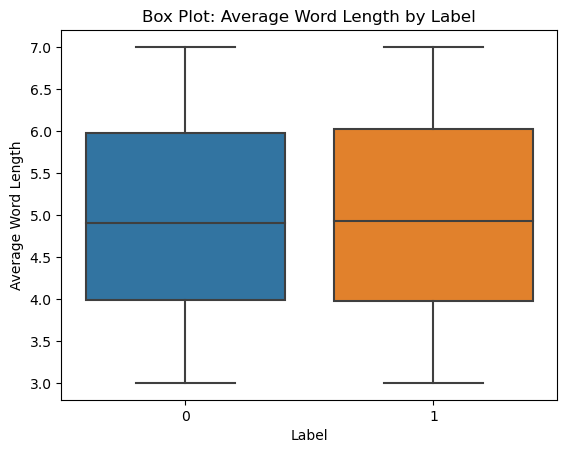

In [21]:
sns.boxplot(x="Label", y="Average_Word_Length", data=df)
plt.title("Box Plot: Average Word Length by Label")
plt.xlabel("Label")
plt.ylabel("Average Word Length")
plt.show()


Based on this plot, the distribution of the average word length variable appears to be similar in both real and fake news articles.


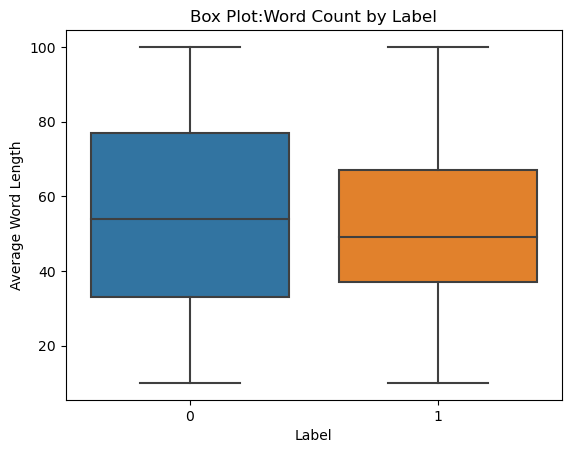

In [20]:
sns.boxplot(x="Label", y="Word_Count", data=df)
plt.title("Box Plot:Word Count by Label")
plt.xlabel("Label")
plt.ylabel("Average Word Length")
plt.show()

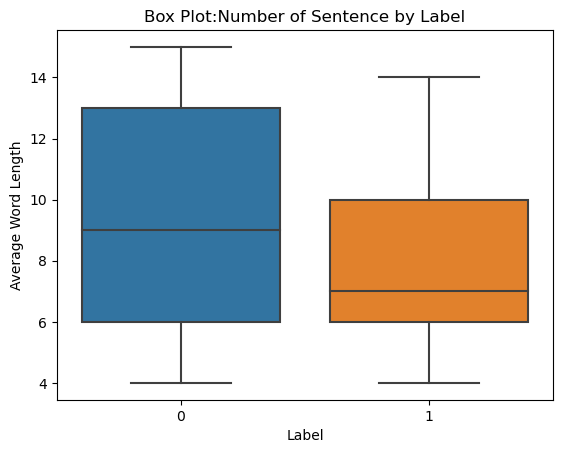

In [22]:
sns.boxplot(x="Label", y="Number_of_Sentence", data=df)
plt.title("Box Plot:Number of Sentence by Label")
plt.xlabel("Label")
plt.ylabel("Average Word Length")
plt.show()


The analysis of the average number of sentences per article reveals that real news articles (Label 0) have an average of approximately 9 sentences per article, whereas fake news articles (Label 1) exhibit a slightly lower average of about 7 sentences. This observation suggests that, on average, real news articles tend to contain more sentences compared to fake news articles. This finding aligns with expectations, as genuine news reports often provide more detailed and comprehensive information, potentially leading to longer articles with a higher sentence count

C:\Users\sauma\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


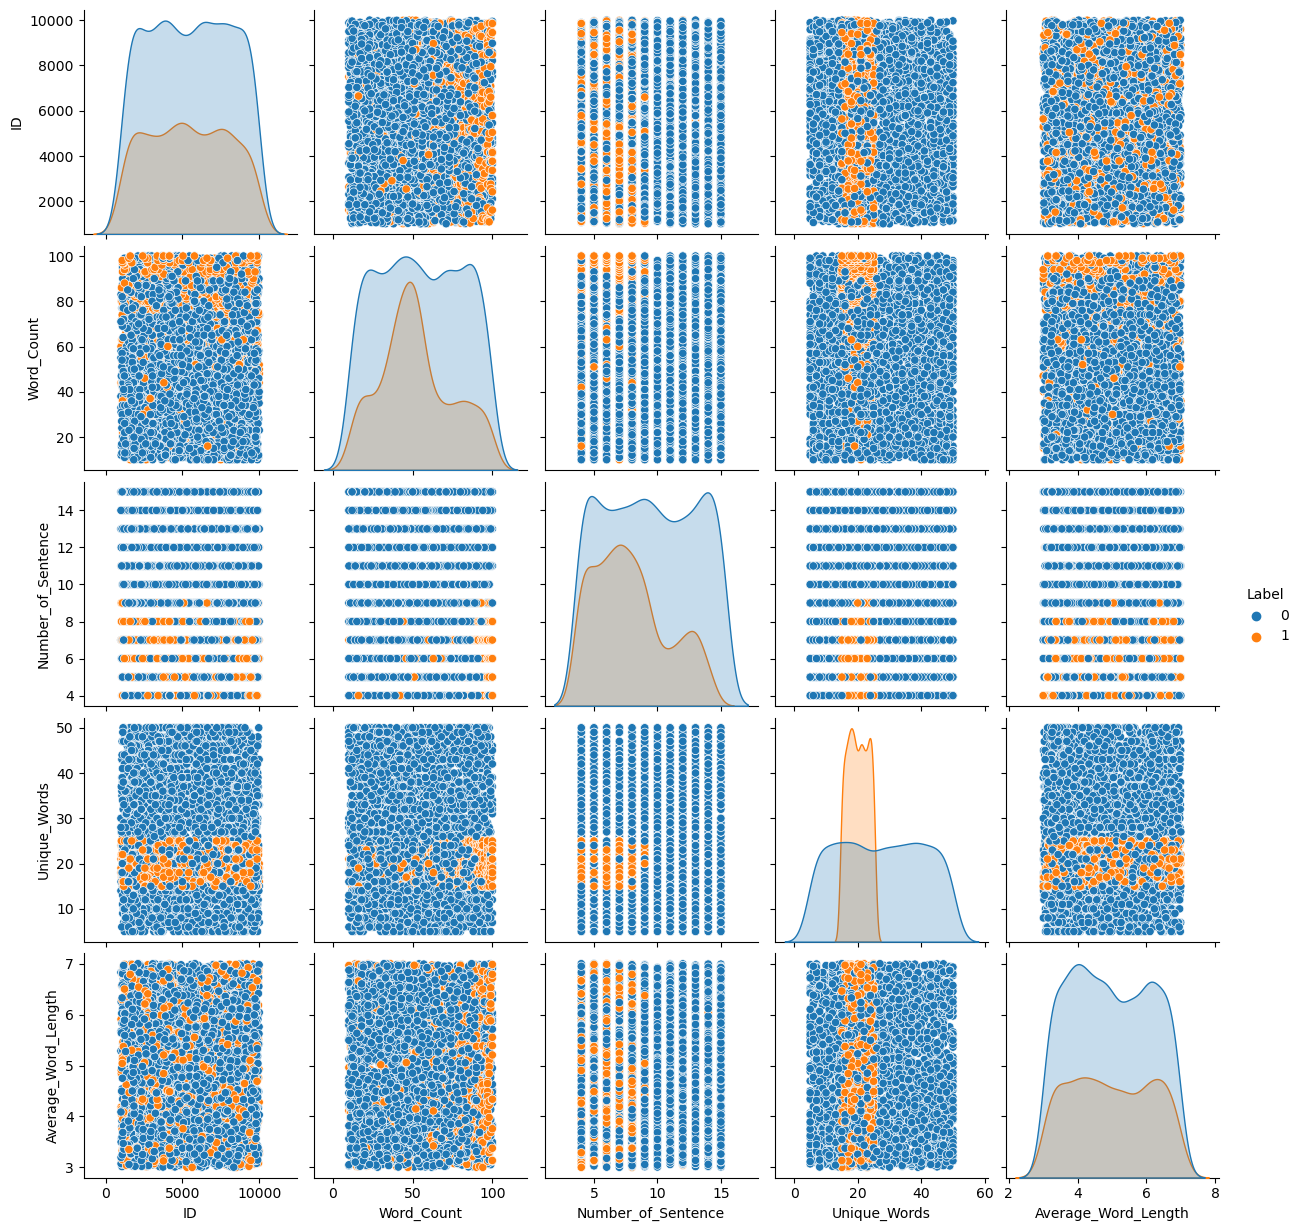

In [24]:
sns.pairplot(df, hue = 'Label')

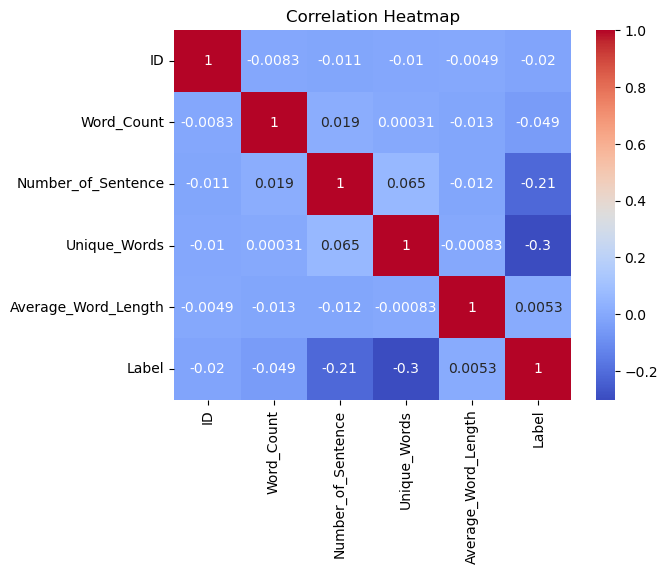

In [12]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Building the Model

In [31]:
X = df.drop(['Label',"ID"], axis=1)
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 40)

In [38]:
model = RandomForestClassifier(n_estimators =250,max_depth =5,random_state=40)
model.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, n_estimators=250, random_state=40)

In [39]:
y_pred = model.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test data:", accuracy)

Accuracy on test data: 0.8955555555555555


In [41]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

F1 Score: 0.8588588588588589


<Axes: >

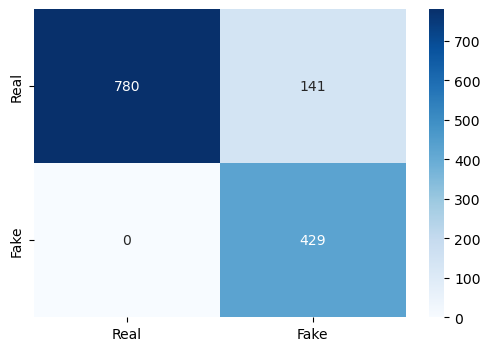

In [44]:
cm = confusion_matrix(y_test, y_pred)
class_labels = ['Real', 'Fake']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

## Results
The accuracy was found out to be 89.5% and F1 Score was 85.8%. While testing the model, it was found that the model predictyed 780 real articles that were real while the false positives were 141. The model predicted all the fake articles as fake. Overall, The accuracy was quite good.